# A CNN (image based) Model

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

# Define your data directories
train_dir = './DATA/images_original/train/'
val_dir = './DATA/images_original/validate/'
test_dir = './DATA/images_original/test/'

batch = 4
epoch = 10

In [2]:
# Defining data generators
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(432, 288),
        batch_size=batch,
        color_mode='grayscale',
        class_mode='categorical')

val_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(432, 288),
        batch_size=batch,
        color_mode='grayscale',
        class_mode='categorical')

test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=(432, 288),
        batch_size=batch,
        color_mode='grayscale',
        class_mode='categorical')

Found 549 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 250 images belonging to 10 classes.


In [3]:
# Defining model architecture
my_model = tf.keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(432, 288, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compiling model
my_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
#DO NOT RUN THIS CELL, USE EXISTING WEIGHTS!
# Training the model

# history = my_model.fit(train_generator,
#                     steps_per_epoch=len(train_generator),
#                     epochs=epoch,
#                     validation_data=val_generator,
#                     validation_steps=len(val_generator))

In [5]:
# Defining new model with the same architecture
new_model = keras.models.clone_model(my_model)

#Compiling Model copy
new_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Loading the weights (from the file into the new model)
new_model.load_weights('./CNN_image_weights.h5')


In [6]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 430, 286, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 215, 143, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 141, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 106, 70, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 68, 64)       36928     
                                                                 
 flatten (Flatten)           (None, 452608)            0

In [7]:
# Evaluating the model
test_loss, test_acc = new_model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)


2023-06-16 11:09:58.364160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 4s 59ms/step - loss: 4.1454 - accuracy: 0.4320
Test accuracy: 0.4320000112056732


In [15]:
history = my_model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=epoch,
                    validation_data=val_generator,
                    validation_steps=len(val_generator))

Epoch 1/10


2023-06-16 11:13:29.195874: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


138/138 [==============================] - ETA: 0s - loss: 2.5584 - accuracy: 0.1366

2023-06-16 11:14:39.132854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


138/138 [==============================] - 73s 522ms/step - loss: 2.5584 - accuracy: 0.1366 - val_loss: 2.1643 - val_accuracy: 0.1250
Epoch 2/10
138/138 [==============================] - 73s 529ms/step - loss: 1.8664 - accuracy: 0.3825 - val_loss: 1.6127 - val_accuracy: 0.4350
Epoch 3/10
138/138 [==============================] - 74s 539ms/step - loss: 0.8986 - accuracy: 0.7177 - val_loss: 1.7605 - val_accuracy: 0.4950
Epoch 4/10
138/138 [==============================] - 75s 540ms/step - loss: 0.1937 - accuracy: 0.9545 - val_loss: 1.8819 - val_accuracy: 0.4750
Epoch 5/10
138/138 [==============================] - 75s 543ms/step - loss: 0.0328 - accuracy: 0.9945 - val_loss: 3.0292 - val_accuracy: 0.4450
Epoch 6/10
138/138 [==============================] - 75s 542ms/step - loss: 0.0986 - accuracy: 0.9800 - val_loss: 3.0502 - val_accuracy: 0.4400
Epoch 7/10
138/138 [==============================] - 74s 537ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 3.0985 - val_accuracy: 0.4

In [16]:
# function to show epoch vs metrics
def plotValidate(history):
    print("Validation Accuracy", max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

Validation Accuracy 0.5049999952316284


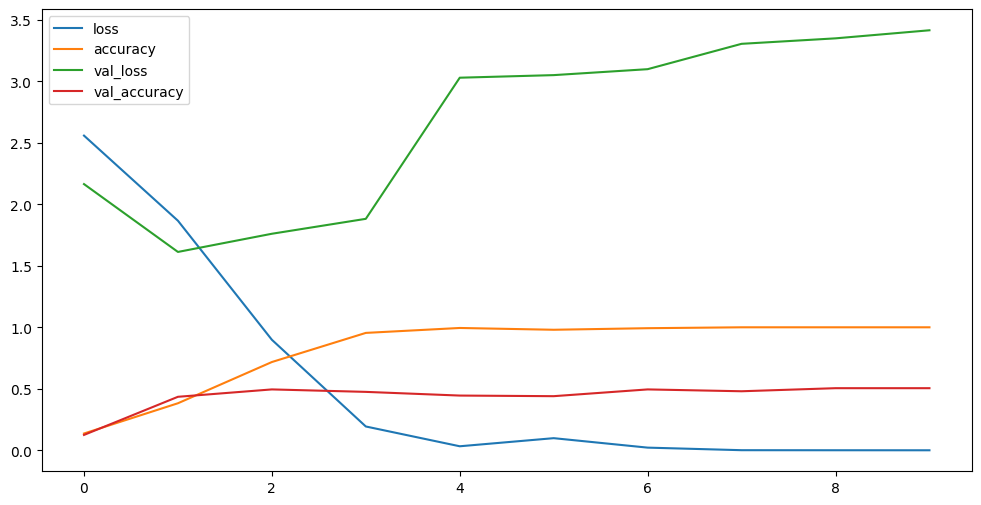

In [20]:
plotValidate(history)

## Module to input Audio file and get Predicted label:

In [10]:
import librosa
import numpy as np
from tensorflow.keras.preprocessing import image

audio_file = "./DATA/to_predict/blues.00001.wav"

class_indices = {1:"Blues", 2:"Classical", 3:"Country", 4:"Disco",
                 5:"Hiphop", 6:"Jazz", 7:"Metal", 8:"Pop", 9:"Reggae", 10:"Rock"}

In [11]:
# Defining a function to extract spectrogram from audio file
def extract_spectrogram(audio_file, n_fft=2048, hop_length=512, num_mels=128):
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None, mono=True)
    # Compute spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=num_mels)
    # Convert spectrogram to dB scale
    log_S = librosa.power_to_db(S, ref=np.max)
    # Resize spectrogram to match input size of model
    spec = np.resize(log_S, (1, 432, 288, 1))
    return spec

In [12]:
# Defining a function to predict genre from audio file
def predict_genre(model, audio_file, class_indices, n_fft=2048, hop_length=512, num_mels=128):
    # Extract spectrogram from audio file
    spec = extract_spectrogram(audio_file, n_fft=n_fft, hop_length=hop_length, num_mels=num_mels)
    
    # Make prediction
    preds = model.predict(spec)
    
    # Map prediction to genre label
    predicted_label = list(class_indices.values())[list(class_indices.keys()).index(np.argmax(preds))]
    
    # Return predicted genre
    return predicted_label

predicted_genre = predict_genre(new_model, audio_file, class_indices)
print('Predicted genre:', predicted_genre)

1/1 [==============================] - 0s 124ms/step
Predicted genre: Metal


# Confusion Matrix

 1/63 [..............................] - ETA: 8s

2023-06-16 11:10:10.380843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


63/63 [==============================] - 4s 57ms/step


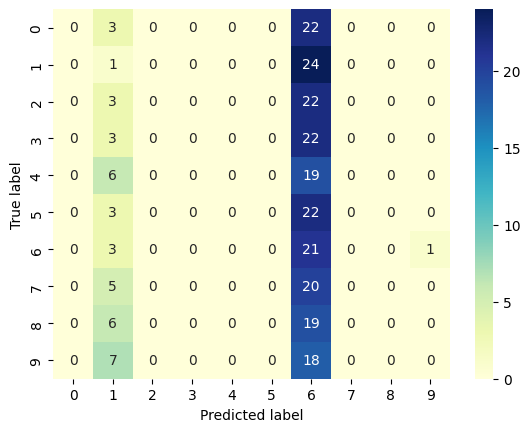

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for test set
y_pred = my_model.predict(test_generator)

# Convert predictions from one-hot encoding to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# Create confusion matrix
confusion_mtx = confusion_matrix(true_classes, y_pred_classes)

# Plot confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


# Abstract Model Visualization

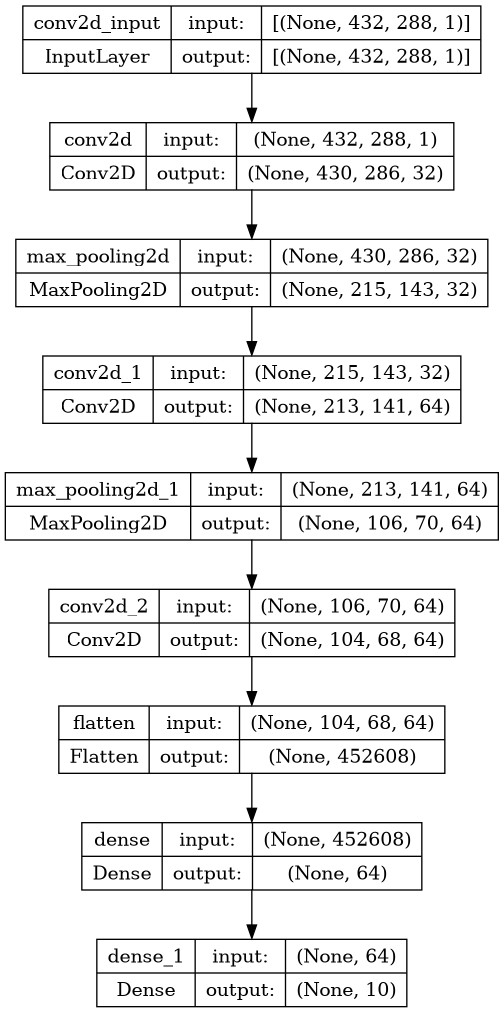

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(new_model, to_file='model.png', show_shapes=True)
